In [10]:
import pandas as pd
from learning_curve import plot_learning_curve
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import make_scorer, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC




In [11]:
data = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

def drop_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= Q1 - 1.5*IQR) & (df[column] <= Q3 + 1.5*IQR)]

data = drop_outliers_iqr(data, 'BMI')
data = drop_outliers_iqr(data, 'GenHlth')

X = data.drop('Diabetes_binary', axis=1)
y = data['Diabetes_binary']

macro_recall_scorer = make_scorer(recall_score, average='macro')


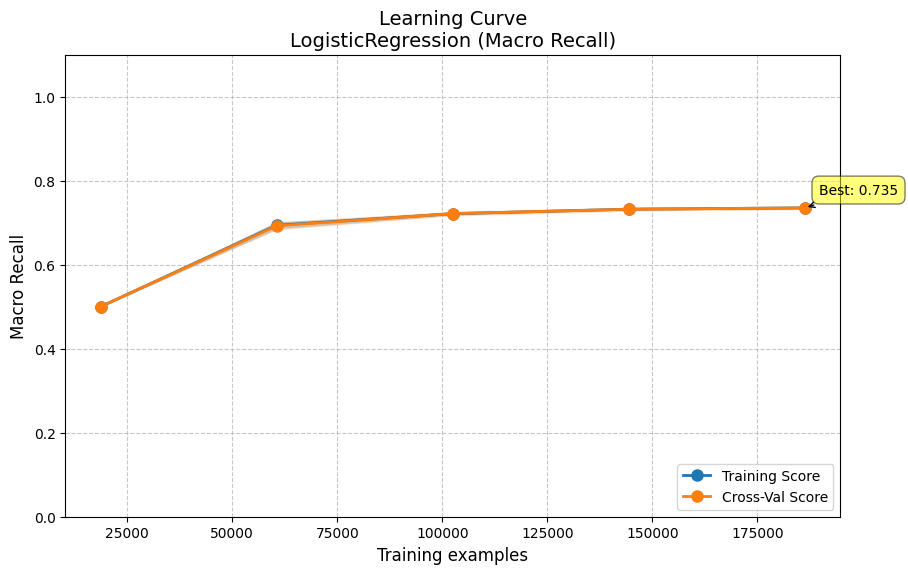

In [ ]:


logisticmodel = LogisticRegression( C=0.0001, penalty='l1', solver='saga',class_weight="balanced",)

plot_learning_curve( estimator=logisticmodel, X=X, y=y, cv=KFold(n_splits=5, shuffle=True, random_state=42),
    modelname="LogisticRegression",scoring=macro_recall_scorer)

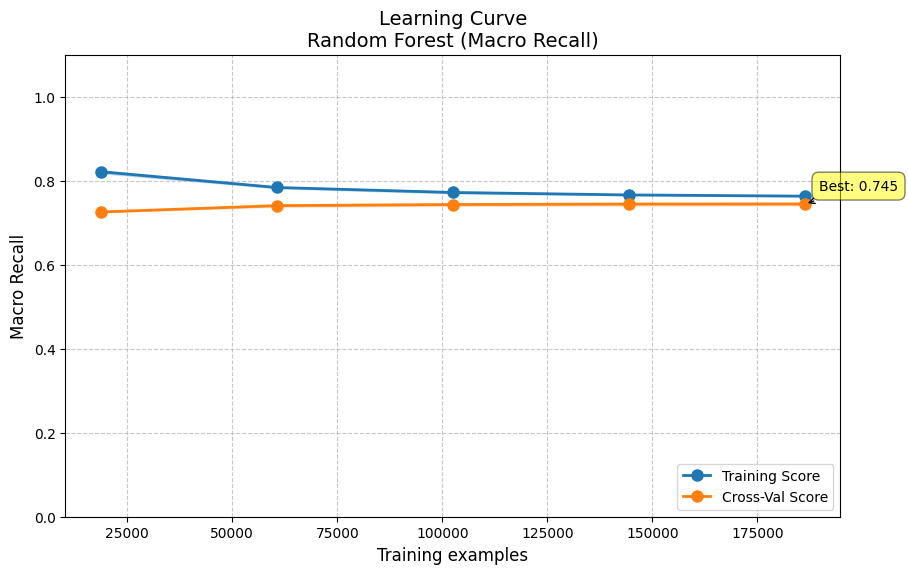

In [ ]:

randomForestmodel = RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, n_estimators=200)
plot_learning_curve( estimator=randomForestmodel, X=X, y=y, cv=KFold(n_splits=5, shuffle=True, random_state=42),
    modelname="Random Forest",scoring=macro_recall_scorer)

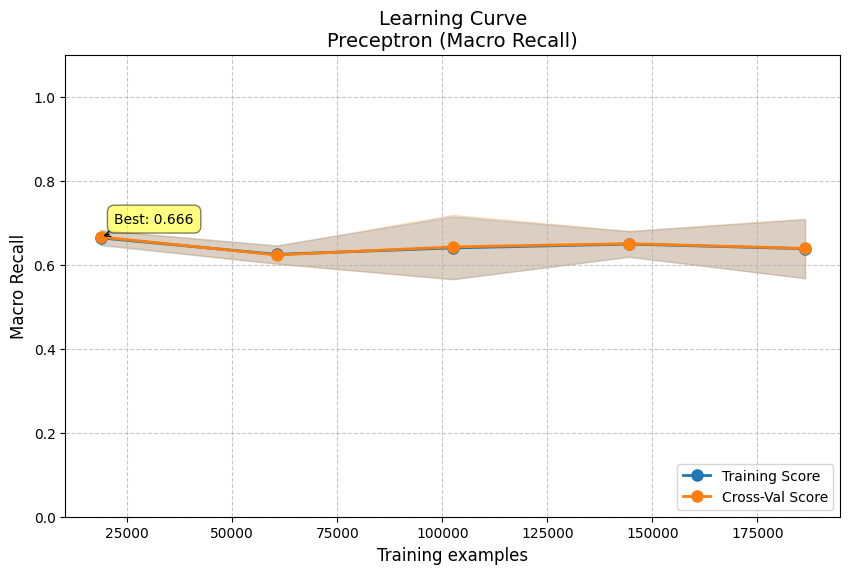

In [ ]:
preceptronmodel = Perceptron( eta0=0.1, alpha=0.0001,random_state=42,class_weight='balanced',penalty='l1')
plot_learning_curve( estimator=preceptronmodel, X=X, y=y, cv=KFold(n_splits=5, shuffle=True, random_state=42),
    modelname="Preceptron",scoring=macro_recall_scorer)

In [15]:
SVCmodel = SVC(C=0.1, random_state=42, kernel='rbf', gamma='scale', degree=2,class_weight='balanced',probability=True)
plot_learning_curve( estimator=SVCmodel, X=X, y=y, cv=KFold(n_splits=5, shuffle=True, random_state=42),
    modelname="SVC",scoring=macro_recall_scorer,save=True)

KeyboardInterrupt: 